In [1]:
import pandas as pd  



In [2]:
df = pd.read_csv('Student_performance_data .csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
def assign_grade(gpa):
    if gpa >= 3.5:
        return 'A'
    elif 3.0 <= gpa < 3.5:
        return 'B'
    elif 2.5 <= gpa < 3.0:
        return 'C'
    elif 2.0 <= gpa < 2.5:
        return 'D'
    else:
        return 'F'

df['Grade'] = df['GPA'].apply(assign_grade)

df.head(10)




,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Grade
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,C
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,B
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,F
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,D
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,F
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0,B
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0,C
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0,F
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0,C
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0,A


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

def calculate_grid(total_plots, columns_per_row=5):
    """Calculates the grid dimensions for subplots."""
    rows = math.ceil(total_plots / columns_per_row)
    columns = min(total_plots, columns_per_row)
    return rows, columns

def Plot_Histograms(x_data, y_data, title=None, figsize=(15, 5), columns_per_row=5):
    """Plots histograms for each dataset in y_data, aligned with x_data if needed."""

    num_rows, num_columns = calculate_grid(len(y_data), columns_per_row)
    print(f'DATA={len(y_data)}')

    fig, axs = plt.subplots(num_rows, num_columns, figsize=(figsize[0], figsize[1] * num_rows))

    if num_rows == 1:
        axs = np.array([axs])

    for i, yn in enumerate(y_data):
        row = i // columns_per_row
        col = i % columns_per_row

        if num_rows > 1:
          ax = axs[row, col]
        else:
          ax = axs[0,col]

        ax.set_title(yn, fontsize=12)
        ax.set_xlabel('Grade', fontsize=10) # Using yn as x label, you can change this.
        ax.set_ylabel('Frequency', fontsize=10)
        ax.hist(y_data[yn], bins=10, alpha=0.7, color='skyblue', edgecolor='black')

        ax.grid(True, linestyle='--', alpha=0.5)
        ax.tick_params(axis='both', which='major', labelsize=8)

    for i in range(len(y_data), num_rows * num_columns):
        row = i // columns_per_row
        col = i % columns_per_row

        if num_rows > 1:
          fig.delaxes(axs[row, col])
        else:
          fig.delaxes(axs[0,col])

    if title is not None:
        fig.suptitle(title, fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

DATA=9


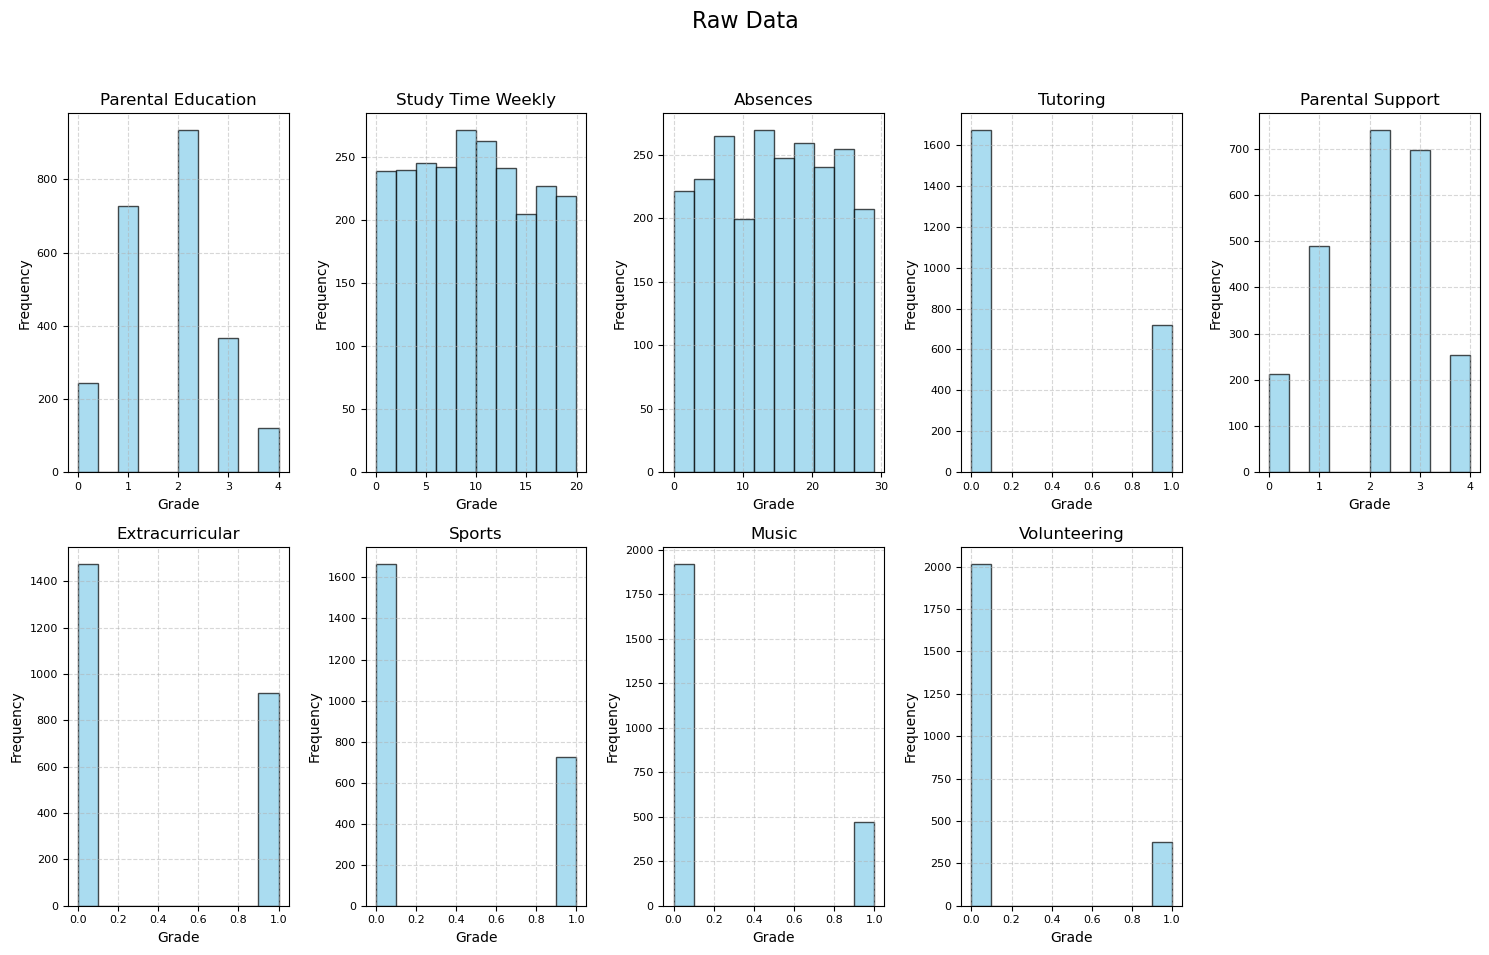

In [ ]:
x = np.array(df['Grade'])
y1= np.array(df['ParentalEducation'])
y2 = np.array(df['StudyTimeWeekly'])
y3 = np.array(df['Absences'])
y4 = np.array(df['Tutoring'])
y5= np.array(df['ParentalSupport'])
y6 = np.array(df['Extracurricular'])
y7 = np.array(df['Sports'])
y8 = np.array(df['Music'])
y9 = np.array(df['Volunteering'])

y = {'Parental Education' : y1, 'Study Time Weekly' : y2, 'Absences' : y3, 'Tutoring' : y4,'Parental Support' : y5, 'Extracurricular' : y6, 'Sports' : y7, 'Music' : y8, 'Volunteering': y9}

Plot_Histograms(x,y, title = 'Raw Data')

This data analysis shows us that extracurricular and tutoring can be dropped with the skew data. Maybe after sorting the data we can re-attempt them but as of now we drop them. Study time and absence needs further inspection, but they do not have any relationship with the grade directly.

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


DATA=2


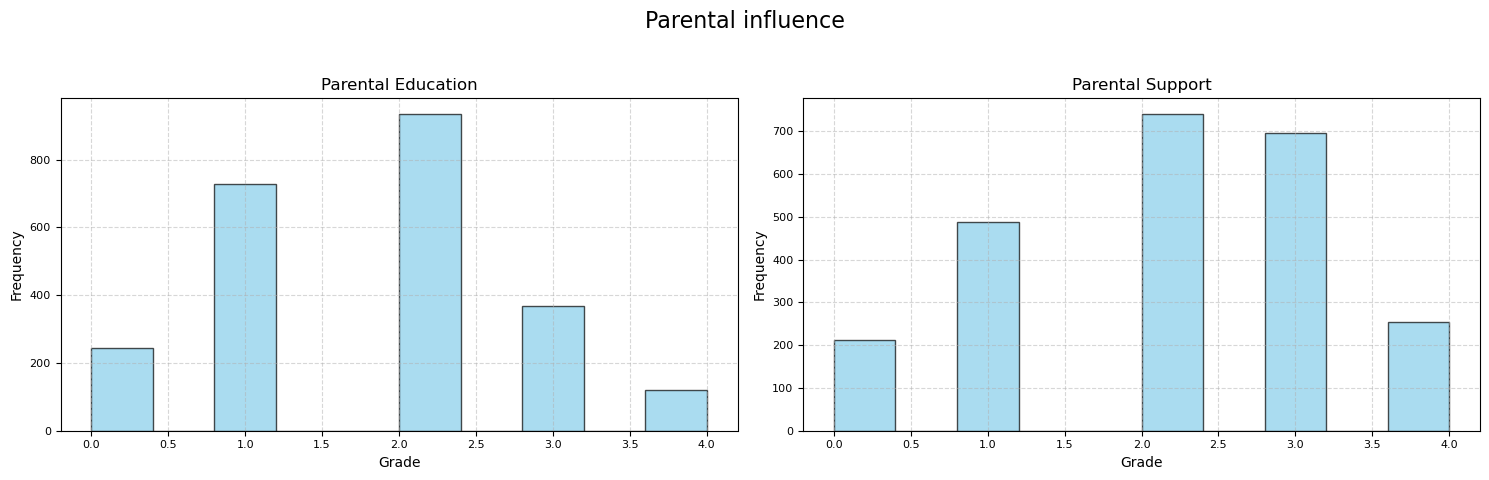

In [ ]:
x = np.array(df['Grade'])
y1= np.array(df['ParentalEducation'])
y2= np.array(df['ParentalSupport'])

y = {'Parental Education' : y1, 'Parental Support' : y2}

Plot_Histograms(x,y, title = 'Parental influence')

We can see signs that parental education has a positive trend for students up to C but the students that are B and up are adapted enough to school to not need parental education.

Same with the parental support but it also includes B students.

Thus, contacting parents regarding their influence we can identify early who might need extra help.

We can see that linear regression can be used with absence and grade the more absent the less grade.

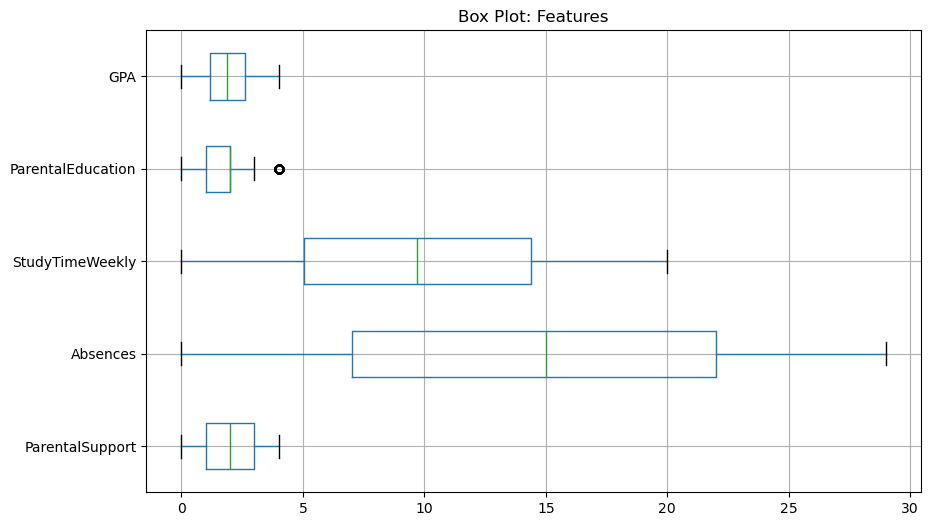

In [ ]:
features = ['ParentalSupport','Absences','StudyTimeWeekly','ParentalEducation','GPA']

fig, ax = plt.subplots(figsize=(10,6))
boxplot = df[features].boxplot(vert = False, ax=ax)  
_ = ax.set_title('Box Plot: Features')

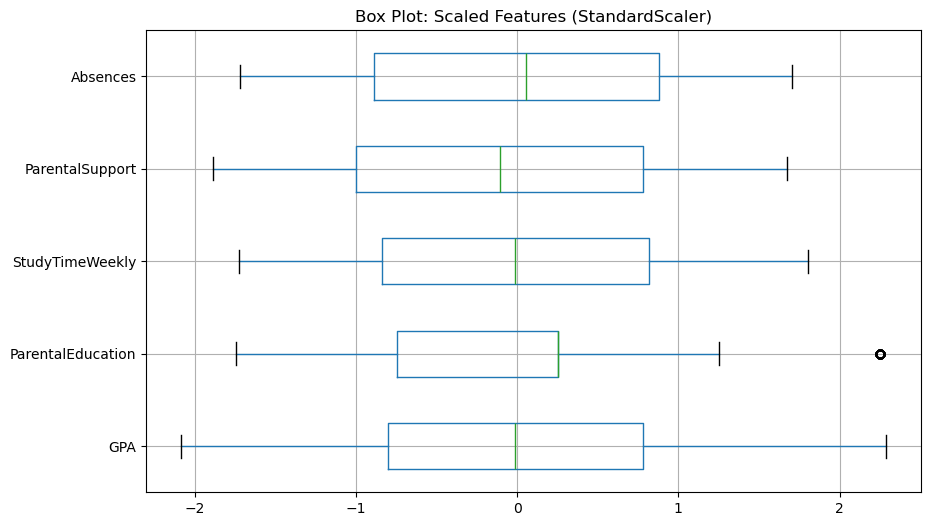

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming your data is in a DataFrame called 'df'
features = ['GPA', 'ParentalEducation', 'StudyTimeWeekly', 'ParentalSupport', 'Absences']

# Scale the data using StandardScaler
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])  # Scale the specified columns

# Plot the scaled data
fig, ax = plt.subplots(figsize=(10, 6))
df[features].boxplot(vert=False, ax=ax)
ax.set_title('Box Plot: Scaled Features (StandardScaler)')
plt.show()

 Accuracy: 0.9206680584551148

 Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.64      0.74        22
         1.0       0.86      0.88      0.87        49
         2.0       0.94      0.86      0.90        85
         3.0       0.90      0.90      0.90        86
         4.0       0.94      0.99      0.96       237

    accuracy                           0.92       479
   macro avg       0.90      0.85      0.87       479
weighted avg       0.92      0.92      0.92       479



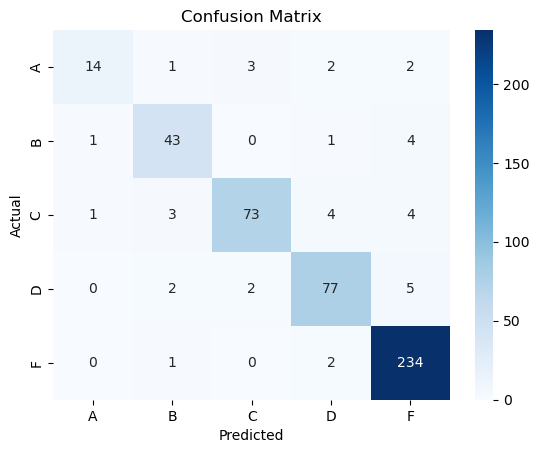

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("Student_performance_data .csv")
df.columns = df.columns.str.strip()

# Features and target
features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
target = 'GradeClass'

X = df[features]
y = df[target]

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['A','B','C','D','F'], yticklabels=['A','B','C','D','F'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


 MLP Classifier Accuracy: 0.8872651356993737

 MLP Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.41      0.56        22
         1.0       0.78      0.88      0.83        49
         2.0       0.92      0.85      0.88        85
         3.0       0.82      0.85      0.83        86
         4.0       0.92      0.96      0.94       237

    accuracy                           0.89       479
   macro avg       0.87      0.79      0.81       479
weighted avg       0.89      0.89      0.88       479



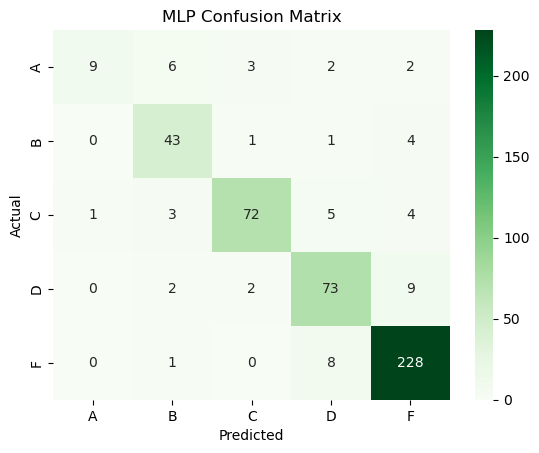

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize MLP model (basic neural network)
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Predictions
y_pred_mlp = mlp_model.predict(X_test)

# Evaluation
print(" MLP Classifier Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("\n MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))

# Confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Greens', xticklabels=['A','B','C','D','F'], yticklabels=['A','B','C','D','F'])
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Load your dataset
df = pd.read_csv('Student_performance_data .csv')
df.columns = df.columns.str.strip()  # Clean up column names

# Drop GPA and StudentID, set GradeClass as target
X = df.drop(columns=['GradeClass', 'GPA', 'StudentID']).values
y = df['GradeClass'].astype(int).values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert data to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the MLP model
class MLPModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLPModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.output(x)
        return self.softmax(x)

# Model parameters
input_dim = X_train.shape[1]
hidden_dim = 64
output_dim = len(np.unique(y))

# Instantiate the model
model = MLPModel(input_dim, hidden_dim, output_dim)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}")

# Evaluation on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on test set: {accuracy:.2f}%')

Epoch 10/50, Loss: 1.1423
Epoch 20/50, Loss: 1.1104
Epoch 30/50, Loss: 1.0937
Epoch 40/50, Loss: 1.0810
Epoch 50/50, Loss: 1.0700
Accuracy on test set: 71.61%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
df = pd.read_csv('Student_performance_data .csv')

# Assume GPA is the target variable
X = df.drop('GPA', axis=1).values
y = df['GPA'].values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert data to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the MLP model for regression (adjustable architecture)
class MLPModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super(MLPModel, self).__init__()
        layers = []
        layers.append(nn.Linear(input_dim, hidden_dim))
        layers.append(nn.ReLU())
        
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.ReLU())
        
        layers.append(nn.Linear(hidden_dim, 1))  # Output a single continuous value (GPA)
        
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Hyperparameters
input_dim = X_train.shape[1]  # Number of features in the dataset
hidden_dim = 128             # Number of neurons in hidden layers
num_layers = 3               # Number of hidden layers
learning_rate = 0.001        # Initial learning rate
epochs = 100                 # Number of training epochs
patience = 10                # Early stopping patience (stop if no improvement after 'patience' epochs)

# Initialize model, loss function, and optimizer
model = MLPModel(input_dim, hidden_dim, num_layers)
criterion = nn.MSELoss()  # For regression problems
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Early stopping variables
best_loss = float('inf')
patience_counter = 0

# Training loop with early stopping
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    # Training phase
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)

    # Early stopping check
    if avg_loss < best_loss:
        best_loss = avg_loss
        patience_counter = 0  # Reset the counter if loss improves
    else:
        patience_counter += 1

    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")

    # Stop early if no improvement after 'patience' epochs
    if patience_counter >= patience:
        print("Early stopping triggered.")
        break

# Evaluate on the test set
model.eval()  # Set model to evaluation mode
y_pred = []
y_true = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        y_pred.extend(outputs.squeeze().numpy())  # Flatten the predictions
        y_true.extend(labels.numpy())  # True labels

# Calculate Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")
print(f"R-squared (R²) on test set: {r2:.4f}")

Epoch 10/100, Loss: 0.0281
Epoch 20/100, Loss: 0.0185
Epoch 30/100, Loss: 0.0120
Epoch 40/100, Loss: 0.0088
Epoch 50/100, Loss: 0.0058
Epoch 60/100, Loss: 0.0035
Epoch 70/100, Loss: 0.0028
Epoch 80/100, Loss: 0.0026
Epoch 90/100, Loss: 0.0056
Epoch 100/100, Loss: 0.0022
Mean Squared Error (MSE) on test set: 0.0534
R-squared (R²) on test set: 0.9354


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Load your dataset
df = pd.read_csv('Student_performance_data .csv')

# Features (X) and target (y - GPA)
X = df.drop('GPA', axis=1).values  
y = df['GPA'].values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert data to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  # For regression
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the MLP model for regression
class MLPModel(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(MLPModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, 1)  # Output a single continuous value (GPA)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.output(x)  # No activation here, since we want a continuous output
        return x

# Model parameters
input_dim = X_train.shape[1]  # Number of features
hidden_dim = 64              # Number of neurons in hidden layers

# Instantiate the model
model = MLPModel(input_dim, hidden_dim)

# Loss function and optimizer
criterion = nn.MSELoss()  # For regression problems
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)  # Squeeze to match the target shape
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}")

# Evaluation on test set
model.eval()  # Set model to evaluation mode
total_loss = 0.0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)  # Squeeze to match the target shape
        total_loss += loss.item()

# Print the average loss on the test set
print(f"Test Loss: {total_loss / len(test_loader):.4f}")

Epoch 10/50, Loss: 0.0422
Epoch 20/50, Loss: 0.0305
Epoch 30/50, Loss: 0.0240
Epoch 40/50, Loss: 0.0205
Epoch 50/50, Loss: 0.0179
Test Loss: 0.0452


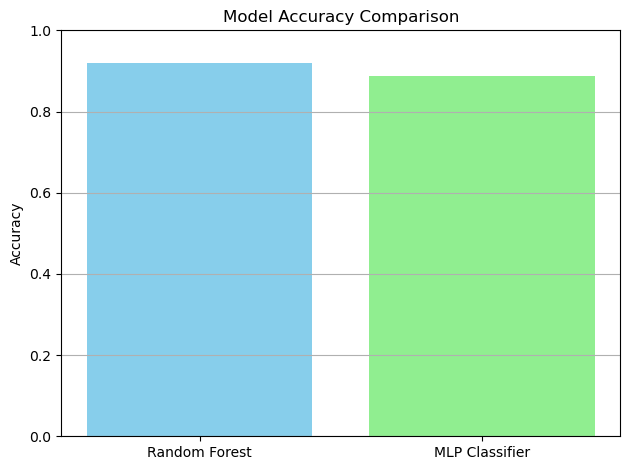

In [ ]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'MLP Classifier']
accuracies = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_mlp)]

plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

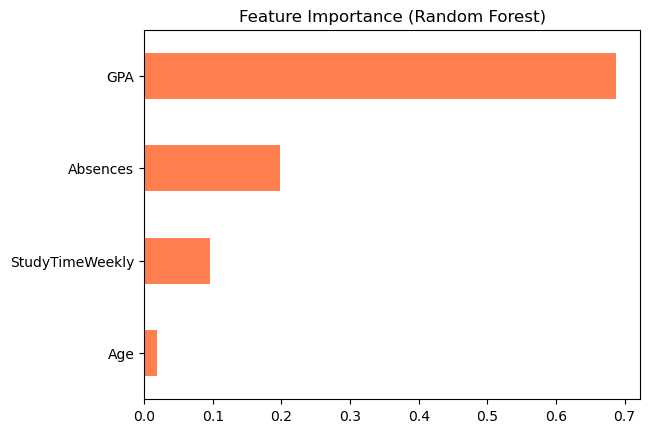

In [ ]:
importances = model.feature_importances_
feature_names = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
forest_importances = pd.Series(importances, index=feature_names)

forest_importances.plot(kind='barh', color='coral')
plt.title("Feature Importance (Random Forest)")
plt.show()

In [ ]:
train_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}")

Epoch 10/50, Loss: 0.0161
Epoch 20/50, Loss: 0.0128
Epoch 30/50, Loss: 0.0117
Epoch 40/50, Loss: 0.0095
Epoch 50/50, Loss: 0.0084


C:\Users\ryanc\AppData\Local\Temp\ipykernel_16336\3090966417.py:8: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


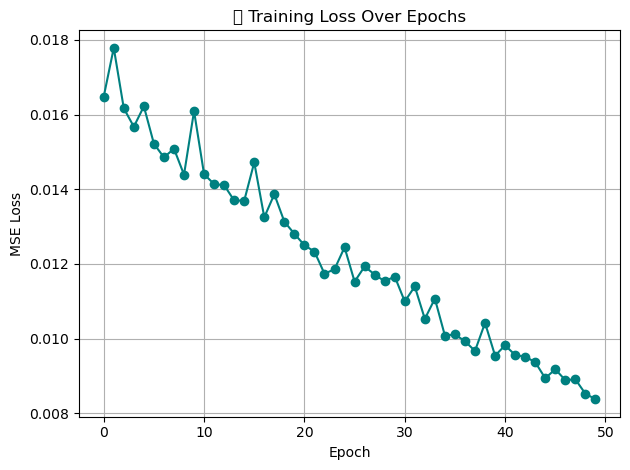

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, marker='o', color='teal')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\ryanc\AppData\Local\Temp\ipykernel_16336\3376250138.py:20: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


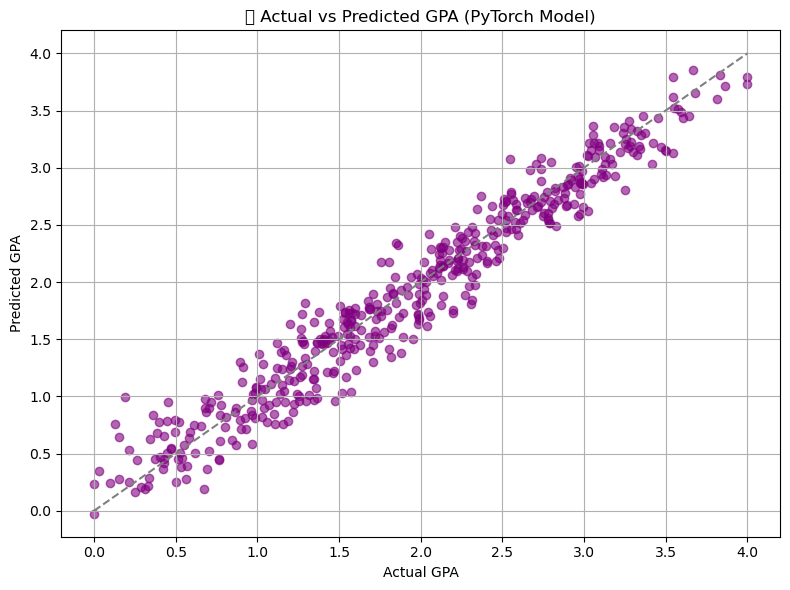

In [ ]:
# Get predictions on test set
model.eval()
y_preds = []

with torch.no_grad():
    for inputs, _ in test_loader:
        outputs = model(inputs)
        y_preds.extend(outputs.squeeze().numpy())

# Plot actual vs predicted
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_preds, color='purple', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title("Actual vs Predicted GPA (PyTorch Model)")
plt.grid(True)
plt.tight_layout()
plt.show()